In [42]:
import yt
from yt.units import *
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('seaborn')
#sns.set_context('poster')
#sns.set_style('darkgrid', {'grid.color': 'gray', 'grid.linewidth': '10'})
sns.set_style('white')

In [43]:
ds = yt.load("/Volumes/Elements/foggieforayan/halo_004123/nref11c_nref9f/RD0020/RD0020")

yt : [INFO     ] 2022-03-17 17:39:43,425 Parameters: current_time              = 154.80100926529
yt : [INFO     ] 2022-03-17 17:39:43,426 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-03-17 17:39:43,427 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-03-17 17:39:43,427 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-03-17 17:39:43,428 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-03-17 17:39:43,429 Parameters: current_redshift          = 2
yt : [INFO     ] 2022-03-17 17:39:43,430 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2022-03-17 17:39:43,430 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2022-03-17 17:39:43,431 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2022-03-17 17:39:43,432 Parameters: hubble_constant           = 0.695


In [3]:
def my_young_stars(pfilter, data):
    '''
    Filter star particles with creation time < threshold Myr ago
    To use: yt.add_particle_filter("young_stars8", function=_young_stars8, filtered_type='all', requires=["creation_time"])
    Based on: foggie.yt_fields._young_stars8()
    '''
    isstar = data[(pfilter.filtered_type, "particle_type")] == 2
    age = data.ds.current_time - data[pfilter.filtered_type, "creation_time"]
    filter = np.logical_and(isstar, age.in_units('Myr') <= 10., age >= 0)
    return filter

yt.add_particle_filter('my_young_stars', function=my_young_stars, filtered_type='all', requires=['creation_time', 'particle_type'])
ds.add_particle_filter('my_young_stars')

Parsing Hierarchy : 100%|█████████▉| 10743/10744 [00:01<00:00, 7957.62it/s] 
yt : [INFO     ] 2021-06-22 13:58:16,602 Gathering a field list (this may take a moment.)


True

In [40]:
center = YTArray([23293.48374328, 22958.66858759, 23271.98604886], 'kpc')
x_width = 4 * kpc
small_box = ds.r[center[0] - x_width / 2.: center[0] + x_width / 2., center[1] - x_width / 2.: center[1] + x_width / 2., center[2] - x_width / 2.: center[2] + x_width / 2.]

Parsing Hierarchy : 100%|██████████| 10744/10744 [00:00<00:00, 13104.07it/s]
yt : [INFO     ] 2022-03-17 17:39:21,553 Gathering a field list (this may take a moment.)


yt : [INFO     ] 2022-03-17 17:39:28,670 Projection completed
yt : [INFO     ] 2022-03-17 17:39:28,673 xlim = 22956.668588 22960.668588
yt : [INFO     ] 2022-03-17 17:39:28,675 ylim = 23269.986049 23273.986049
yt : [INFO     ] 2022-03-17 17:39:28,678 xlim = 0.478647 0.478730
yt : [INFO     ] 2022-03-17 17:39:28,680 ylim = 0.485179 0.485263
yt : [INFO     ] 2022-03-17 17:39:28,682 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800



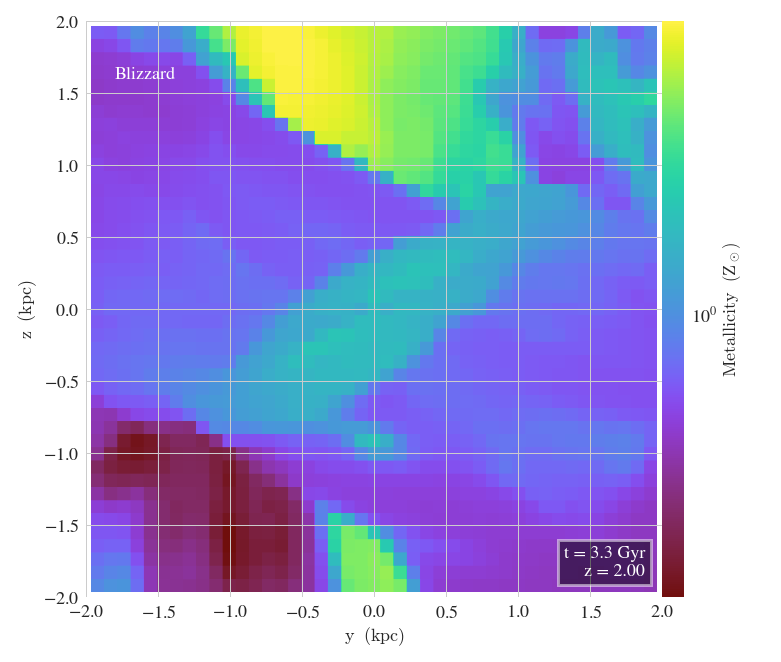

In [41]:
proj = yt.ProjectionPlot(ds, 'x', ('gas', 'metallicity'), center=center, data_source=small_box, width=x_width, weight_field=('gas', 'density'))
proj.annotate_timestamp(corner='lower_right', redshift=True, draw_inset_box=True)
proj.annotate_text((0.05, 0.9), 'Blizzard', coord_system='axis', text_args = {'fontsize': 500, 'color': 'white'})


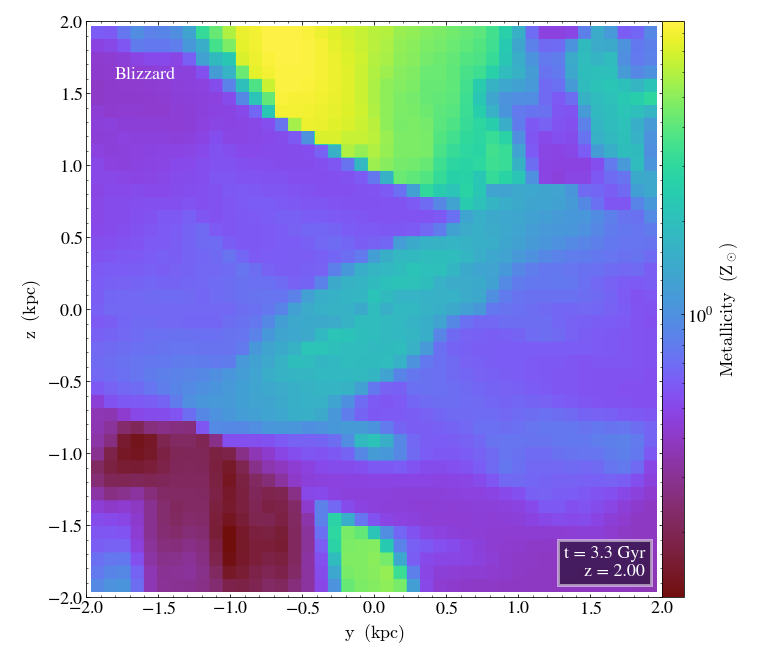

In [6]:
proj.set_unit(('gas', 'metallicity'), 'Zsun')


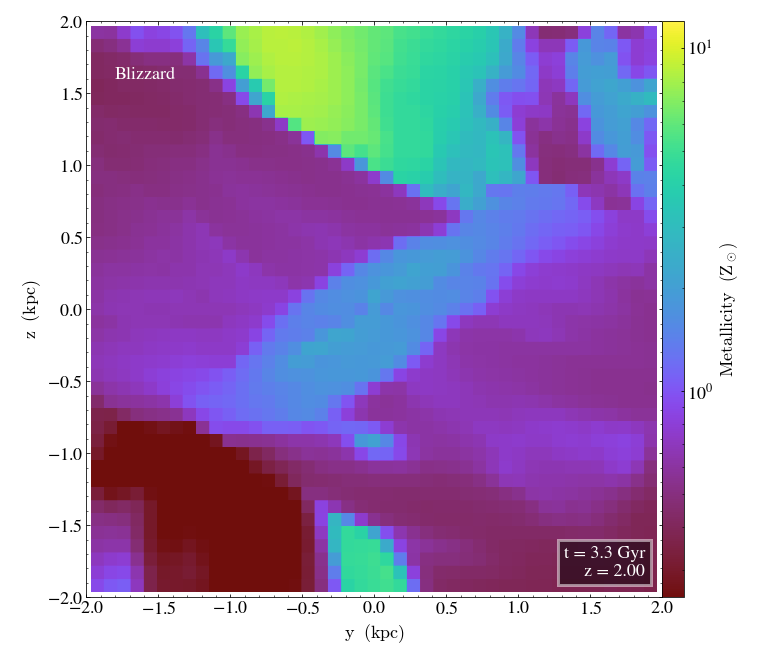

In [7]:
proj.set_zlim(('gas', 'metallicity'), zmin=2.5e-1, zmax=1.2e1)

yt : [INFO     ] 2021-06-22 13:58:39,390 Making a fixed resolution buffer of (('gas', 'metallicity')) 67 by 67



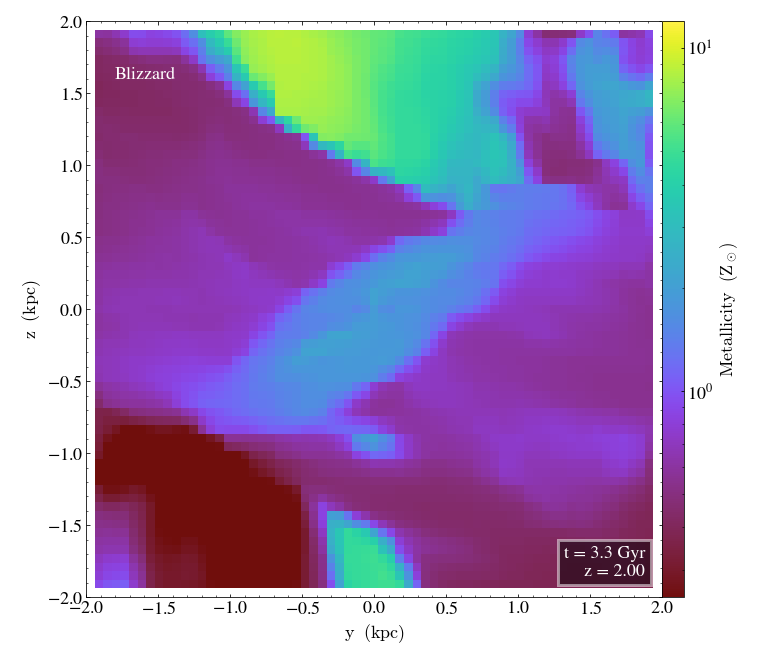

In [8]:
proj.set_buff_size((67, 67))

In [9]:
proj.save(name='/Users/acharyya/Work/astro/foggie_outputs/plots_halo_004123/nref11c_nref9f/figs/RD0020/gas_metallicity_box=%.2Fkpc' % (x_width), suffix='png', mpl_kwargs={'dpi': 500})

yt : [INFO     ] 2021-06-22 13:58:39,722 Saving plot /Users/acharyya/Work/astro/foggie_outputs/plots_halo_004123/nref11c_nref9f/figs/RD0020/gas_metallicity_box=4.00kpc_Projection_x_metallicity_density.png


['/Users/acharyya/Work/astro/foggie_outputs/plots_halo_004123/nref11c_nref9f/figs/RD0020/gas_metallicity_box=4.00kpc_Projection_x_metallicity_density.png']

yt : [INFO     ] 2021-06-22 14:01:43,778 xlim = 22956.668588 22960.668588
yt : [INFO     ] 2021-06-22 14:01:43,781 ylim = 23269.986049 23273.986049
yt : [INFO     ] 2021-06-22 14:01:43,786 xlim = 0.478647 0.478730
yt : [INFO     ] 2021-06-22 14:01:43,789 ylim = 0.485179 0.485263
yt : [INFO     ] 2021-06-22 14:01:43,793 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800
yt : [INFO     ] 2021-06-22 14:01:43,997 Making a fixed resolution buffer of (('gas', 'metallicity')) 67 by 67



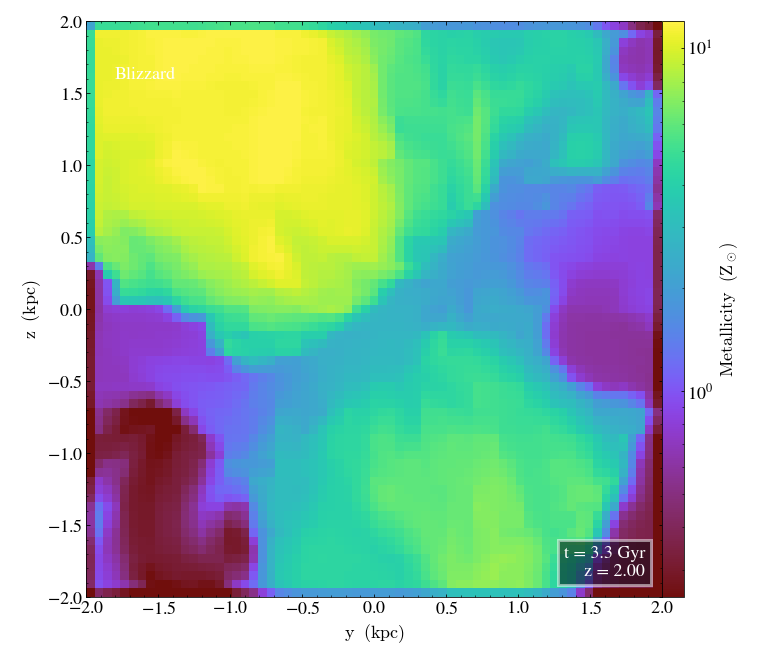

In [10]:
slc = yt.SlicePlot(ds, 'x', ('gas', 'metallicity'), center=center + [0.5, 0, 0] * kpc, data_source=small_box, width=x_width)
slc.annotate_timestamp(corner='lower_right', redshift=True, draw_inset_box=True)
slc.annotate_text((0.05, 0.9), 'Blizzard', coord_system='axis', text_args = {'fontsize': 500, 'color': 'white'})
slc.set_unit(('gas', 'metallicity'), 'Zsun')
slc.set_zlim(('gas', 'metallicity'), zmin=2.5e-1, zmax=1.2e1)
slc.set_buff_size((67, 67))

yt : [INFO     ] 2021-06-22 14:04:48,094 xlim = 22956.668588 22960.668588
yt : [INFO     ] 2021-06-22 14:04:48,095 ylim = 23269.986049 23273.986049
yt : [INFO     ] 2021-06-22 14:04:48,096 xlim = 0.478647 0.478730
yt : [INFO     ] 2021-06-22 14:04:48,097 ylim = 0.485179 0.485263
yt : [INFO     ] 2021-06-22 14:04:48,099 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800
yt : [INFO     ] 2021-06-22 14:04:48,249 Making a fixed resolution buffer of (('gas', 'metallicity')) 67 by 67



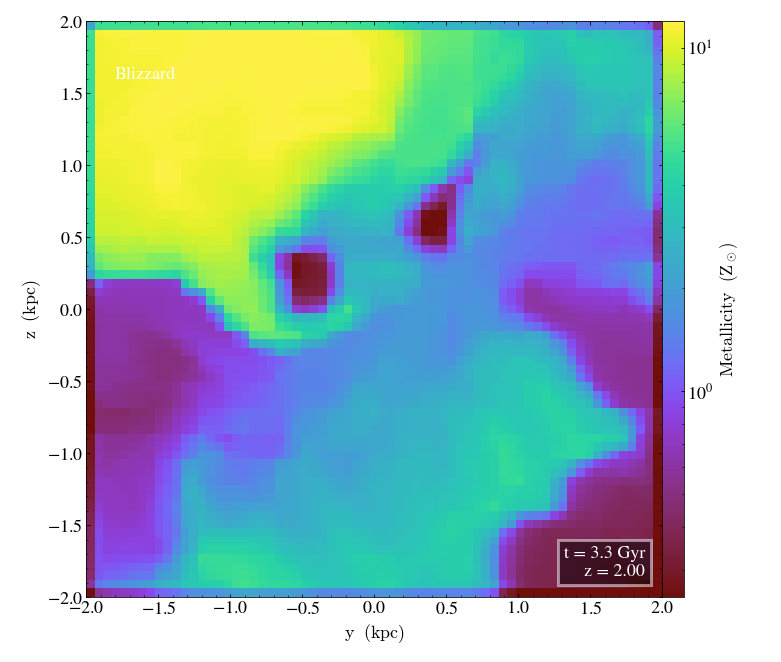

In [11]:
slc = yt.SlicePlot(ds, 'x', ('gas', 'metallicity'), center=center + [1.0, 0, 0] * kpc, data_source=small_box, width=x_width)
slc.annotate_timestamp(corner='lower_right', redshift=True, draw_inset_box=True)
slc.annotate_text((0.05, 0.9), 'Blizzard', coord_system='axis', text_args = {'fontsize': 500, 'color': 'white'})
slc.set_unit(('gas', 'metallicity'), 'Zsun')
slc.set_zlim(('gas', 'metallicity'), zmin=2.5e-1, zmax=1.2e1)
slc.set_buff_size((67, 67))

yt : [INFO     ] 2021-06-22 14:07:54,060 xlim = 22956.668588 22960.668588
yt : [INFO     ] 2021-06-22 14:07:54,063 ylim = 23269.986049 23273.986049
yt : [INFO     ] 2021-06-22 14:07:54,067 xlim = 0.478647 0.478730
yt : [INFO     ] 2021-06-22 14:07:54,068 ylim = 0.485179 0.485263
yt : [INFO     ] 2021-06-22 14:07:54,072 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800
yt : [INFO     ] 2021-06-22 14:07:54,240 Making a fixed resolution buffer of (('gas', 'metallicity')) 67 by 67



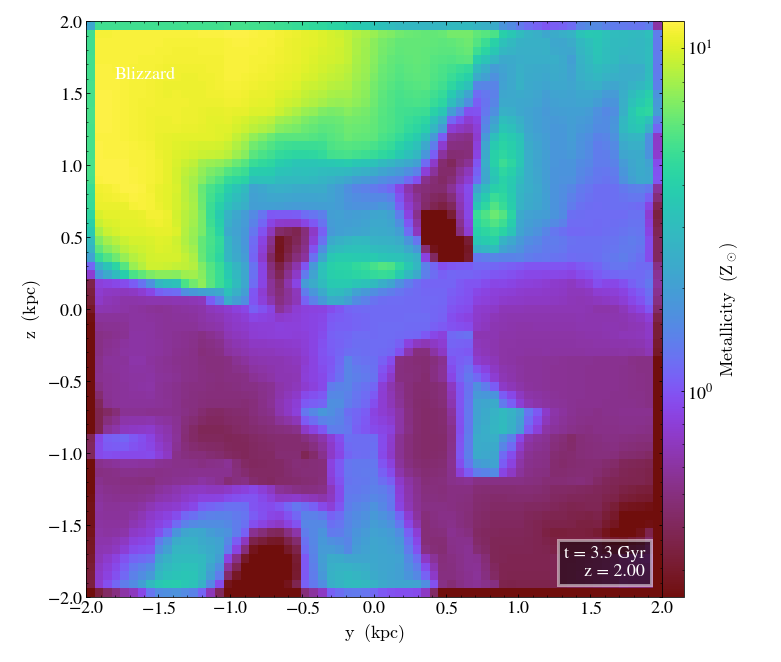

In [12]:
slc = yt.SlicePlot(ds, 'x', ('gas', 'metallicity'), center=center + [1.5, 0, 0] * kpc, data_source=small_box, width=x_width)
slc.annotate_timestamp(corner='lower_right', redshift=True, draw_inset_box=True)
slc.annotate_text((0.05, 0.9), 'Blizzard', coord_system='axis', text_args = {'fontsize': 500, 'color': 'white'})
slc.set_unit(('gas', 'metallicity'), 'Zsun')
slc.set_zlim(('gas', 'metallicity'), zmin=2.5e-1, zmax=1.2e1)
slc.set_buff_size((67, 67))